# Proyek Analisis Data: E-Commerce Public Dataset

- **Nama:** Muhammad Adi Nugroho
- **Email:** m.adinuugroho@gmail.com
- **ID Dicoding:** m_adinuugroho

Link to the Data (kaggle version): [Brazilian E-commerce](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

## Business Understanding

>Objective : **Increasing E-commerce Revenue**. <br>

In order to achieve that, we can do RFM analysis to know the high value customers, and then implement strategies to increase their spend

>Business Question :
1. What is the average spending per customer?
2. In which month do customers spend the most?
3. Which location has the highest customers spending?
4. What is the average time between purchases for a customers?
5. How many customers are there in each RFM segment? 

## Import Library

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import zipfile 
import os

## Data Wrangling

### Gathering Data

In [3]:
# Specify the Path
directory_data = 'E-Commerce Public Dataset'

# Initializing to DataFrame
customers = pd.read_csv(os.path.join(directory_data, 'customers_dataset.csv'))
geolocation = pd.read_csv(os.path.join(directory_data, 'geolocation_dataset.csv'))
items = pd.read_csv(os.path.join(directory_data, 'order_items_dataset.csv'))
payments = pd.read_csv(os.path.join(directory_data, 'order_payments_dataset.csv'))
reviews = pd.read_csv(os.path.join(directory_data, 'order_reviews_dataset.csv'))
orders = pd.read_csv(os.path.join(directory_data, 'orders_dataset.csv'))
products_translation = pd.read_csv(os.path.join(directory_data, 'product_category_name_translation.csv'))
products = pd.read_csv(os.path.join(directory_data, 'products_dataset.csv'))
sellers = pd.read_csv(os.path.join(directory_data, 'sellers_dataset.csv'))

In [4]:
# Store it to Dictionary to make it easier processing
data = {
    'customers':customers,
    'geolocation':geolocation,
    'items':items,
    'payments':payments,
    'reviews':reviews,
    'orders':orders,
    'products_translation':products_translation,
    'products':products,
    'sellers':sellers
}

In [5]:
# To display all columns 
pd.set_option('display.max_columns', None)

### Assessing Data

This section is aims to understand the characteristics of the data

#### A.1 `customers dataset`

In [6]:
data['customers'].head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [7]:
data['customers'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
data['customers'].describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


##### Check Duplicate

In [9]:
print(f'Duplicate rows in customers_dataset\t\t: {data['customers'].duplicated().sum()}')
print(f'Duplicate values in customer_id column\t\t: {data['customers'].duplicated(subset='customer_id').sum()}') 
print(f'Duplicate values in customer_unique_id column\t: {data['customers'].duplicated(subset='customer_unique_id').sum()}')

Duplicate rows in customers_dataset		: 0
Duplicate values in customer_id column		: 0
Duplicate values in customer_unique_id column	: 3345


From above output we know that, 
1. There are no duplicate in `customers_dataset` data.
2. There are no duplicate values in column `customer_id`, which mean all transactions are unique, original, no bugs, no error.
3. A total of `99441` transactions were recorded. These transactions were made by `96096` unique customers. Additionally, `3345` customers have returned to make additional purchases at the store.

#### A.2 geolocation dataset

In [10]:
data['geolocation'].head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [11]:
data['geolocation'].describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [12]:
data['geolocation'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [13]:
data['geolocation'][data['geolocation'].duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


#### A.3 order items dataset

In [14]:
data['items'].sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
63955,921095a3d078c4caa4259c1208a71f66,1,3b0f7951038b105522c2d566b54421f7,562fc2f2c2863ab7e79a9e4388a58a14,2018-03-28 22:47:39,28.99,18.23
46828,6a75f9aed5e4fd6946ec8e3984c77e9f,1,ad4b943ef0b5cd9e4211c9cf6c27ff13,ef506c96320abeedfb894c34db06f478,2018-08-06 21:35:22,34.99,15.35
34855,4ee98e5c36cdadbb40216412e0364478,1,80e7f6c61346d1feb1bca71585ac62e4,634964b17796e64304cadf1ad3050fb7,2018-03-12 14:56:07,89.90,37.32
33944,4cd45eb856471e6d7d1f85e585b81041,1,94cff684a6f115a32507988ff6541801,8648b1e89e9b349e32d3741b30ec737e,2018-07-02 10:15:11,78.50,8.29
53093,78d1ad5b65aecc8f61c0fab7b28e8281,1,2edc5e6012ad882462d116ed5a9e3085,c4fabeea6e569d42d02993bb1f4f1cbc,2018-03-27 11:55:49,99.90,27.25


In [15]:
data['items'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
data['items'].describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [17]:
# Check duplicate in items dataset
data['items'][data['items'].duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [18]:
# Check duplicate in each column
print('Duplicate Order id column\t\t:',data['items'].duplicated(subset='order_id').sum())
print('Duplicate Shipping Limit Date column\t:', data['items'].duplicated(subset='shipping_limit_date').sum())

Duplicate Order id column		: 13984
Duplicate Shipping Limit Date column	: 19332


In [19]:
# Check one of the order_id
data['items'].loc[data['items']['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [20]:
# Check duplicate for order_id and shipping_limit_date
len(data['items'][data['items'].duplicated(subset=['order_id', 'shipping_limit_date'])])

13637

In [21]:
data['items'].loc[~data['items'].duplicated(subset=['order_id', 
                                                'product_id', 
                                                'seller_id',
                                                'shipping_limit_date',
                                                'price',
                                                'freight_value'])].describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,102425,102425.000000,102425,102425,102425,102425.000000,102425.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,ca3625898fbd48669d50701aba51cd5f,NaN,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,2018-05-20 22:50:11,NaN,NaN
freq,8,NaN,467,1982,7,NaN,NaN
mean,NaN,1.046268,NaN,NaN,NaN,124.422006,20.111152
std,NaN,0.276733,NaN,NaN,NaN,188.926084,15.884700
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,40.000000,13.140000
50%,NaN,1.000000,NaN,NaN,NaN,78.800000,16.320000
75%,NaN,1.000000,NaN,NaN,NaN,139.000000,21.220000


#### A.4 payments dataset

In [22]:
data['payments'].head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [23]:
data['payments'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
data['payments'].describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


#### A.5 orders dataset

In [25]:
data['orders'].head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [26]:
data['orders'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [27]:
len(data['orders'])

99441

In [28]:
data['orders'].describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [29]:
print("Duplicate data in data orders\t\t:", data['orders'].duplicated().sum())
print("Duplicate data in the order_id column\t:", data['orders'].duplicated(subset='order_id').sum())

Duplicate data in data orders		: 0
Duplicate data in the order_id column	: 0


In [30]:
# Check order status
data['orders']['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

#### A.6 reviews dataset

In [31]:
data['reviews'].head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [32]:
data['reviews'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [33]:
data['reviews'].describe(include= 'all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


#### A.7 products dataset

In [34]:
data['products'].head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [35]:
data['products'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [36]:
data['products'].describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


#### A.8 products transalation dataset

In [37]:
data['products_translation'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [38]:
data['products_translation'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [39]:
data['products_translation'].describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### A.9 sellers dataset

In [40]:
data['sellers'].head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


From assessing the data, we can get overview about how overall data look like. In order to achieve our objective. We just use some of the datasets, not all of them. 

There are inconsistent unique `order_id` column in some of the dataset. We will check and then clean it to achieve the objective of this project.

### Cleaning Data

In order to execute the RFM analysis, we just need some of the dataset including:
- Geolocation
- Customers
- Orders
- Items/Payments

I must analyze further to know which one should i use, Items/Payments dataset?
I will compare the `payment_value` column in payments dataset with `total_order_value` in items dataset

In [41]:
# Check dataset which have order_id column
for idx, df in data.items():
    if 'order_id' in df.columns:
        print(idx)

items
payments
reviews
orders


In [42]:
# Get unique order_id in orders dataset
order_id_key = data['orders'].order_id.values

# Loop to check the order_id characteristics in each dataset 
for idx, df, in data.items():
    if 'order_id' in df.columns:
        print(f'Length of Original {idx} Dataset\t\t\t\t:', len(df))
        print(f'Length of Unique {idx} Dataset\t\t\t\t\t:', df.loc[df['order_id'].isin(order_id_key)].order_id.nunique())
        # Check if all of the order_id in orders dataset are all in other dataset
        print(f'Is all order_id from orders dataset in this {idx} dataset?\t', df['order_id'].isin(order_id_key).all(), '\n')



Length of Original items Dataset				: 112650
Length of Unique items Dataset					: 98666
Is all order_id from orders dataset in this items dataset?	 True 

Length of Original payments Dataset				: 103886
Length of Unique payments Dataset					: 99440
Is all order_id from orders dataset in this payments dataset?	 True 

Length of Original reviews Dataset				: 99224
Length of Unique reviews Dataset					: 98673
Is all order_id from orders dataset in this reviews dataset?	 True 

Length of Original orders Dataset				: 99441
Length of Unique orders Dataset					: 99441
Is all order_id from orders dataset in this orders dataset?	 True 



In above output, there are different/inconsistent unique order_id. So, next we will use orders dataset for the reference/primary key. 

> Check Items/Payments dataset to decide which one should be use 

In [43]:
# Create total_order_value 
data['items']['total_order_item'] = data['items']['order_item_id'] * data['items']['price']
data['items']['total_freight_value'] = data['items']['order_item_id'] * data['items']['freight_value']
data['items']['total_order_value'] = data['items']['total_order_item'] + data['items']['total_freight_value']

# Grouping order_id in payments dataset
payments_by_order_id = data['payments'].groupby(['order_id']).agg({'payment_value':'sum'})

# Choose random order_id value 
rand_orderid = data['orders']['order_id'].sample(1).iloc[0]

print(
    f'id\t: {rand_orderid}',
    f'\n\nThis is the total_order_value in items dataset for\t:', \
        data['items'].loc[data['items']['order_id'] == rand_orderid, ['total_order_value']].values, \
        
    f'\n\nThis is the payment value from payments dataset\t:',    
        payments_by_order_id.loc[rand_orderid, ('payment_value')],
    
    f'\n\nThe value in total_order_value is the same as payment_value'
)

id	: f23026c2bb8bf3bb814eb4454f169f51 

This is the total_order_value in items dataset for	: [[18.28]
 [36.56]
 [54.84]
 [73.12]] 

This is the payment value from payments dataset	: 73.12 

The value in total_order_value is the same as payment_value


From above analysis, The value is the same. So, to make it simpler EDA i will use payments dataset.

#### a. Merge Data

In [44]:
payments_by_order_id.reset_index(inplace=True)

In [45]:
# Merge customers and orders dataset
cust_ord = pd.merge(
            data['orders'],
            data['customers'],
            how = 'outer',
            on = 'customer_id'
        )

# Merge cust_ord with payments
cust_ord_pay = pd.merge(cust_ord,
                    payments_by_order_id,
                    how='outer',
                    on='order_id')


In [46]:
cust_ord_pay.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_value
49729,803d9be249d7c523418ceffa07d99724,317e53bc7df537e853731bdc538c8c90,delivered,2018-06-11 11:06:25,2018-06-12 11:19:46,2018-06-13 14:36:00,2018-06-19 13:44:34,2018-07-04 00:00:00,06c2538cfac1de544f46529bc1a1c4b2,24020,niteroi,RJ,78.72
46747,788b5c7981deb39a53f098ed02cde155,2943396c3cbe75606b469976a0ec4e68,delivered,2018-03-03 12:22:53,2018-03-03 12:35:36,2018-03-05 18:16:30,2018-03-11 15:18:21,2018-03-26 00:00:00,0bd5a9dbf8d17e95ab729ba47d35004d,5541,sao paulo,SP,56.10
87636,e13c8ddd0d03ac5525c6b54d0442e9a5,0fd965d968903f6f1179bfa430d667ae,delivered,2017-08-29 11:11:36,2017-08-29 11:28:11,2017-09-13 18:53:36,2017-09-18 20:23:52,2017-09-15 00:00:00,f9a71fbff71f4c5a52c8a3fb8e73b2f5,13424,piracicaba,SP,81.89
41935,6bff2212deea719e5035c70aada2a045,f32ec7decf259ca6b5020bbf07f4bc8c,delivered,2017-05-28 21:33:38,2017-05-30 05:05:19,2017-06-01 14:09:34,2017-06-02 15:06:56,2017-06-09 00:00:00,27c2cd2c1d26903e4a3e001bbe8314e6,6413,barueri,SP,87.80
46731,788541a19c0791de0504c5a9cb7e7bd5,a537aaf902d2f436eb7f44817154bb68,delivered,2017-11-30 17:54:28,2017-11-30 18:16:25,2017-12-05 20:58:57,2017-12-13 20:34:50,2017-12-27 00:00:00,02029b32d4185a32a888c3f2d4d8839f,87043,maringa,PR,147.35


In [47]:
cust_ord_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   customer_unique_id             99441 non-null  object 
 9   customer_zip_code_prefix       99441 non-null  int64  
 10  customer_city                  99441 non-null  object 
 11  customer_state                 99441 non-null  object 
 12  payment_value                  99440 non-null 

#### b. Clean Merge Data

In [48]:
# Check Null Value
cust_ord_pay.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_value                       1
dtype: int64

In [49]:
# Take a look null values
cust_ord_pay[cust_ord_pay.isna().any(axis=1)].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_value
58771,982fdef4d624e5de5ab3906bee28fba6,b936b2777040ab52822e140e4f2d4773,shipped,2017-06-23 13:00:47,2017-06-24 14:55:21,2017-06-26 14:56:37,NaN,2017-07-06 00:00:00,6eb453dca2505def092eb261e3a3d8d0,7950,francisco morato,SP,74.03
45585,756fc608f67478946b31c752681f27be,ce5b56c495944af078df7f4e10719be7,canceled,2018-08-14 08:14:45,NaN,NaN,NaN,2018-09-04 00:00:00,6bb7c9ac69dc13b436f413acec41a1b6,86640,cafeara,PR,103.34
54324,8c6eb35c6bb5e1a9dbf00531ab9404e3,5679d50d0154613a2fe16d2fe8fdf33e,shipped,2018-04-06 12:17:13,2018-04-07 02:50:13,2018-04-09 20:04:19,NaN,2018-05-02 00:00:00,b5dc7b035bbfeec18392f1f7ba232b77,52011,recife,PE,31.34
88778,e40d016b1ae85a70208463f0969fcfce,45baf4584b09b21ed234180c74e938b0,shipped,2018-03-10 21:45:45,2018-03-13 04:30:41,2018-03-14 18:28:42,NaN,2018-03-28 00:00:00,bedeb8c6861b84e5b603ba28e78b78e1,4830,sao paulo,SP,60.79
40874,69477156227df21c82fda29850060511,39158ecf3ff6201bdab0f2bed9f00149,shipped,2018-05-17 20:47:54,2018-05-18 02:36:18,2018-05-21 11:04:00,NaN,2018-06-05 00:00:00,0dbd8b3deefed9b0862939c75149df9c,13050,campinas,SP,87.32


From above output we can see the order_status affecting the null values

In [50]:
# Check what are category in order status
cust_ord_pay['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [51]:
# Check what kind of data if the order_status is shipped
cust_ord_pay.loc[cust_ord_pay['order_status'] == 'shipped'].sample(4)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_value
74705,c05e92bb9bfed43c6e5b6d3723fbcc2f,236bb83b33c437ad931a944fe9f8c659,shipped,2018-06-16 19:26:26,2018-06-16 19:58:18,2018-06-18 14:01:00,NaN,2018-07-27 00:00:00,b235f3663dcbf4c7afc36a1ed91090c1,22261,rio de janeiro,RJ,44.29
88570,e38573f7a3dc73addbbd97817bd0369e,110c3f74110dc10d18670b7971d1ff31,shipped,2018-07-18 09:01:50,2018-07-18 09:10:13,2018-07-20 15:07:00,NaN,2018-08-06 00:00:00,2571f41727577645737ff6b834e9043b,31525,belo horizonte,MG,63.42
91298,eaec582d6403b30186964f6df957047e,1318775058e4321f5018e2fe470947cd,shipped,2018-03-21 23:45:08,2018-03-22 15:35:30,2018-03-23 20:47:54,NaN,2018-04-19 00:00:00,9ee6a2c5655e8fc3807cb35989933271,57319,pau d'arco,AL,150.98
60596,9cef7eef349dd605b870fce05c57765f,a241ef5f3554f7a8184134b5fe5bb666,shipped,2018-03-21 11:50:08,2018-03-22 02:51:03,2018-03-22 21:36:38,NaN,2018-04-12 00:00:00,8a222fcabf725d9bb7af3a3b12693a74,89206,joinville,SC,141.73


In [52]:
# Check if there is null in shipped category order status
cust_ord_pay.loc[cust_ord_pay['order_status'] == 'shipped'].isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1107
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_value                       0
dtype: int64

null value in above output is because the package not yet arrived

I will just use delivered and shipped in order_status. The reason because that is the success transaction. And the null value in table is because the order still in shipped, not arrived yet in customers address.

Also, i will drop some columns, because it's just need certain columns to achieve the objective 

In [53]:
# Just Choose Success Orders which is delivered and shipped
cust_ord_pay.loc[cust_ord_pay['order_status'].isin(['delivered', 'shipped'])]
# Drop unused column
cust_ord_pay.drop(columns=['order_approved_at',
                           'order_delivered_carrier_date',
                           'order_delivered_customer_date',
                           'order_estimated_delivery_date'], inplace=True)

In [54]:
cust_ord_pay.isna().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
payment_value               1
dtype: int64

In [55]:
cust_ord_pay.dropna(inplace=True)

The data has been cleaned and is ready for the next step

## Exploratory Data Analysis (EDA)

In [56]:

print(
      f'The timeline start at\t:', 
      min(cust_ord_pay['order_purchase_timestamp']), '-', 
      max(cust_ord_pay['order_purchase_timestamp'])
) 

The timeline start at	: 2016-09-04 21:15:19 - 2018-10-17 17:30:18


From above output, I will limit the data just use year 2017. Because data in 2016 and 2018 not in full month. This will make bias to get conclusion.

In [57]:
cust_ord_pay['order_purchase_timestamp'] = pd.to_datetime(cust_ord_pay['order_purchase_timestamp'])
data_2017 = cust_ord_pay.loc[cust_ord_pay['order_purchase_timestamp'].dt.year == 2017]
data_2017.to_csv('./dashboard/clean_data.csv', index=False)

### 1. What is the average spending per customer?

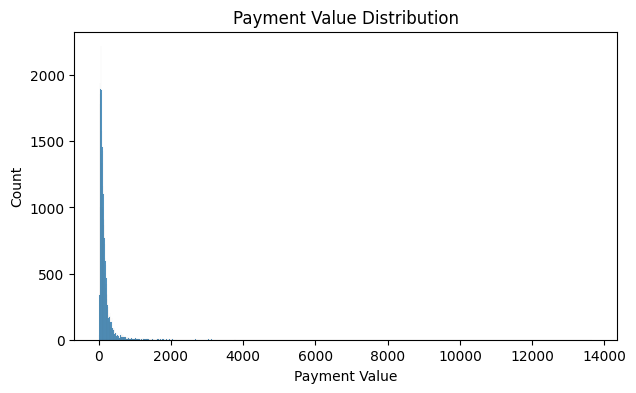

In [58]:
average_spending = data_2017.groupby('customer_unique_id')['payment_value'].mean().reset_index()

import seaborn as sns
# Take a look in distribution spending money
plt.figure(figsize=(7,4))
sns.histplot(average_spending['payment_value'])
plt.title('Payment Value Distribution')
plt.xlabel('Payment Value')
plt.show()

In [59]:
# Average and median spending per customers
print(f'The average spending per customer is\t:', np.average(average_spending['payment_value']))
print(f'The median spending per customer is\t:', np.median(average_spending['payment_value']))

The average spending per customer is	: 161.20977176888647
The median spending per customer is	: 104.37


### 2. In which month do customers spend the most?


In [60]:
# Get the month with the most spend
month_most_spend = data_2017.groupby(data_2017['order_purchase_timestamp'].dt.month)['payment_value'].sum().reset_index()
month_most_cust = data_2017.groupby(data_2017['order_purchase_timestamp'].dt.month)['order_id'].count().reset_index()

print(
    f'The most spend of the customers is in month\t:', f'\n{month_most_spend.loc[month_most_spend['payment_value'].idxmax()]}'
)

The most spend of the customers is in month	: 
order_purchase_timestamp         11.0
payment_value               1194882.8
Name: 10, dtype: float64


In [61]:
month_most_spend

,order_purchase_timestamp,payment_value
0,1,138488.04
1,2,291908.01
2,3,449863.60
3,4,417788.03
4,5,592918.82
5,6,511276.38
6,7,592382.92
7,8,674396.32
8,9,727762.45
9,10,779677.88


### 3. Which location has the highest customers spending?


In [62]:
# Know where customer city with the highest spending
geo_spend = data_2017.groupby('customer_city')['payment_value'].sum().reset_index()

print(
    f'The highest spending customer_city\t:', 
    f'\n{geo_spend.loc[geo_spend['payment_value'].idxmax()]}'
)

The highest spending customer_city	: 
customer_city    sao paulo
payment_value    909863.89
Name: 2877, dtype: object


### 4. What is the average time between purchases for a customers?

In [63]:
avg_time = data_2017[['customer_unique_id', 'order_purchase_timestamp']].sort_values(by=['customer_unique_id', 'order_purchase_timestamp'])

avg_time['time_diff'] = avg_time.groupby('customer_unique_id')['order_purchase_timestamp'].diff()

avg_time['time_diff_days'] = avg_time['time_diff'] / pd.Timedelta(days=1)

isnotna_avgtime = avg_time.loc[~avg_time.isna().any(axis=1)]

avg_time.head()

,customer_unique_id,order_purchase_timestamp,time_diff,time_diff_days
69503,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,NaT,NaN
25240,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,NaT,NaN
84518,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,NaT,NaN
67575,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,NaT,NaN
39785,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18 09:23:10,NaT,NaN


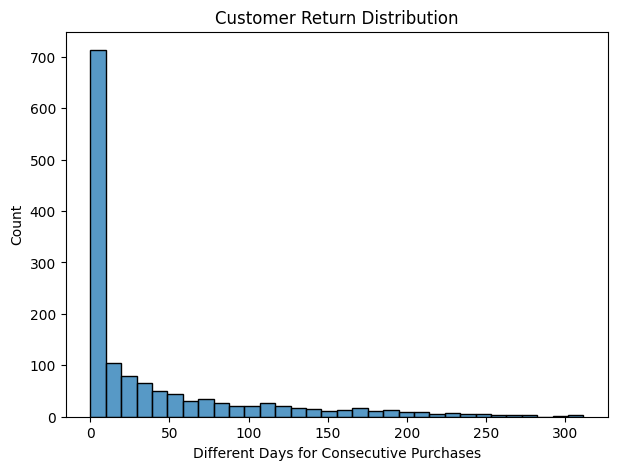

In [64]:
# Create Plot 
plt.figure(figsize=(7, 5))

sns.histplot(isnotna_avgtime['time_diff_days'])

plt.title('Customer Return Distribution')
plt.xlabel('Different Days for Consecutive Purchases')

plt.show()

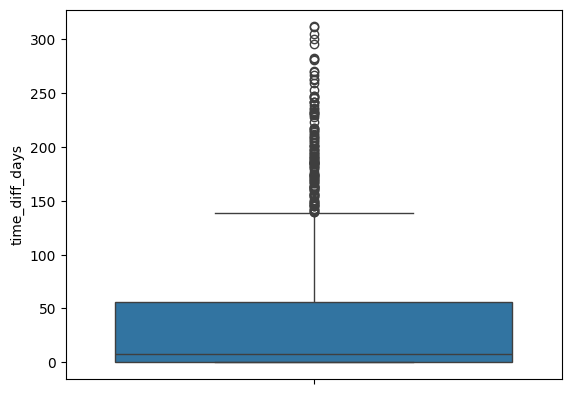

In [65]:
sns.boxplot(isnotna_avgtime['time_diff_days'])
plt.show()

In [66]:
print(
    'Most customers return to purchases within\t:', 
    isnotna_avgtime['time_diff_days'].median().round(0),
    'days'
    )

Most customers return to purchases within	: 8.0 days


### 5. How many customers are there in each RFM segment? 

In [67]:
# Create RFM score
rfm_data = data_2017.groupby('customer_unique_id').size().reset_index(name='frequency')
latest_date = data_2017.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
monetary = data_2017.groupby('customer_unique_id')['payment_value'].sum().reset_index()

In [68]:
# Join RFM 
rfm_data = pd.merge(
    rfm_data,
    latest_date,
    on = 'customer_unique_id'
)

rfm_data = pd.merge(
    rfm_data,
    monetary,
    on = 'customer_unique_id',
    how = 'left'
)

rfm_data

,customer_unique_id,frequency,order_purchase_timestamp,payment_value
0,0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,86.22
1,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,43.62
2,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,196.89
3,0005e1862207bf6ccc02e4228effd9a0,1,2017-03-04 23:32:12,150.12
4,0006fdc98a402fceb4eb0ee528f6a8d4,1,2017-07-18 09:23:10,29.00
...,...,...,...,...
43708,fffbf87b7a1a6fa8b03f081c5f51a201,1,2017-12-27 22:36:41,167.32
43709,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08 21:00:36,2067.42
43710,fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,84.58
43711,ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,112.46


Because we use time period in 2017, i will assumed current date is 2018-01-01 (new year). 

In [69]:
current_date = pd.to_datetime('2018-01-01')
rfm_data['recency'] = (current_date - rfm_data['order_purchase_timestamp']).dt.days

In [70]:
rfm_data.sample(5)

,customer_unique_id,frequency,order_purchase_timestamp,payment_value,recency
38231,df580092def28a46b8d75258dc54e0bf,1,2017-06-20 11:16:37,26.68,194
26673,9c393fe938ba64832b626e908d5c98f6,1,2017-09-07 17:57:13,145.29,115
9911,39deed49c6a307b9b5a83d7fcf45924a,1,2017-12-01 11:50:46,106.43,30
27195,9f681d501492dece2e3ac455de29391a,1,2017-08-08 16:15:05,231.27,145
35836,d15fb07319a69b9ddae13ea902e9b15f,1,2017-11-20 11:47:06,34.85,41


In [71]:
# Recency mapping
percentiles = [0, 20, 40, 60, 80]

def assign_score_by_percentile(value, thresholds, reverse=False):
    if reverse:
        value = max(value, thresholds[0])  # Ensure the value is not lower than the lowest threshold
        
        for i, threshold in enumerate(thresholds):
            if value <= threshold:
                return len(thresholds) - i  # Reverse the score
        return 1  # If the value is higher than the highest threshold, assign the maximum score
    else:
        for i, threshold in enumerate(thresholds):
            if value <= threshold:
                return i + 1  # Scores start from 1
        return len(thresholds) + 1

In [72]:
recency_thresholds = np.percentile(rfm_data['recency'], percentiles)
rfm_data['R'] = rfm_data['recency'].apply(lambda x: assign_score_by_percentile(x, recency_thresholds, reverse=True))

frequency_thresholds = np.percentile(rfm_data['frequency'], percentiles)
rfm_data['F'] = rfm_data['frequency'].apply(lambda x: assign_score_by_percentile(x, frequency_thresholds))*100

payment_value_thresholds = np.percentile(rfm_data['payment_value'], percentiles)
rfm_data['M'] = rfm_data['payment_value'].apply(lambda x: assign_score_by_percentile(x, payment_value_thresholds))*10


rfm_data['RFM Score'] = rfm_data['F'] + rfm_data['M'] + rfm_data['R'] 
rfm_data


,customer_unique_id,frequency,order_purchase_timestamp,payment_value,recency,R,F,M,RFM Score
0,0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,86.22,296,1,100,40,141
1,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,43.62,80,3,100,20,123
2,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,196.89,47,3,100,50,153
3,0005e1862207bf6ccc02e4228effd9a0,1,2017-03-04 23:32:12,150.12,302,1,100,50,151
4,0006fdc98a402fceb4eb0ee528f6a8d4,1,2017-07-18 09:23:10,29.00,166,1,100,20,121
...,...,...,...,...,...,...,...,...,...
43708,fffbf87b7a1a6fa8b03f081c5f51a201,1,2017-12-27 22:36:41,167.32,4,4,100,50,154
43709,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08 21:00:36,2067.42,206,1,100,60,161
43710,fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,84.58,21,4,100,30,134
43711,ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,112.46,327,1,100,40,141


In [73]:
# Create function to mapping the customers based on RFM Score
def map_rfm_score(rfm_score):
    
    if rfm_score >= 500:
        return 'High Value Customer'
    elif  300 < rfm_score < 500:
        return 'Mid Value Customer'
    else:
        return 'Low Value Customer'
    

rfm_data['Customer_Classification'] =  rfm_data['RFM Score'].apply(lambda x: map_rfm_score(x))

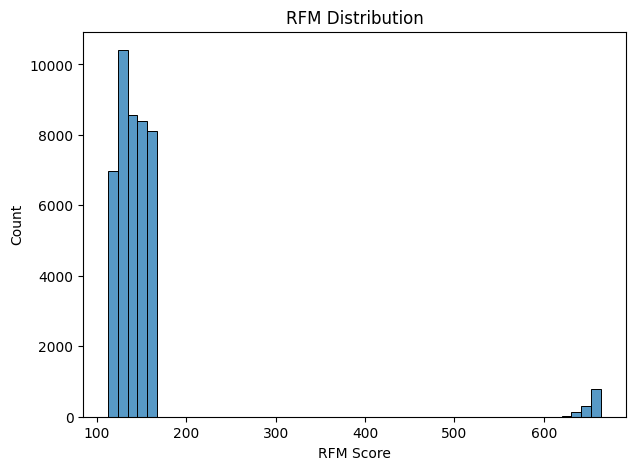

In [74]:
# Create Plot RFM Distribution
plt.figure(figsize=(7, 5))
sns.histplot(rfm_data['RFM Score'], bins=50)

plt.title('RFM Distribution')

plt.show()

In [75]:
print(
    'In each RFM Segment there are\t:\n\n', rfm_data['Customer_Classification'].value_counts()
)


In each RFM Segment there are	:

 Customer_Classification
Low Value Customer     42457
High Value Customer     1256
Name: count, dtype: int64


## Visualization & Exploratory Analysis

### a. Visualization Question Number 2

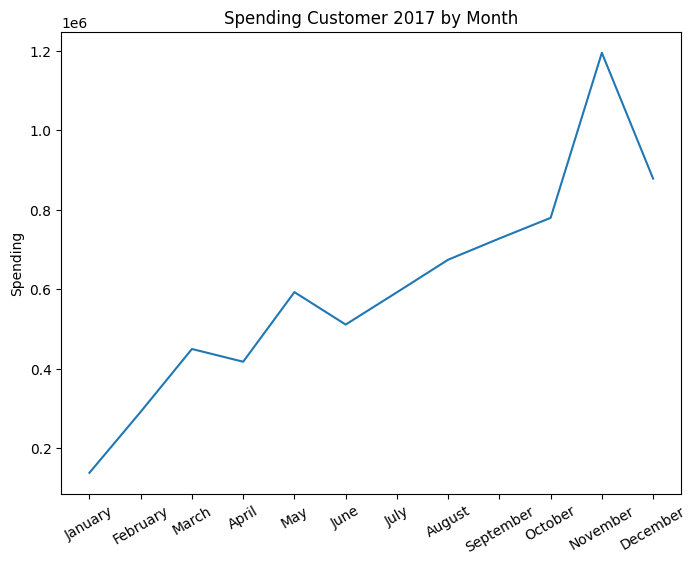

In [76]:
import calendar

# Change number into name of month
month_most_spend['Month'] = [calendar.month_name[m] for m in month_most_spend['order_purchase_timestamp']]

# Create Plot
plt.figure(figsize=(8, 6))
sns.lineplot(month_most_spend, x='Month', y='payment_value')

plt.title('Spending Customer 2017 by Month')
plt.xlabel('')
plt.ylabel('Spending')
plt.xticks(rotation=30)

plt.show()

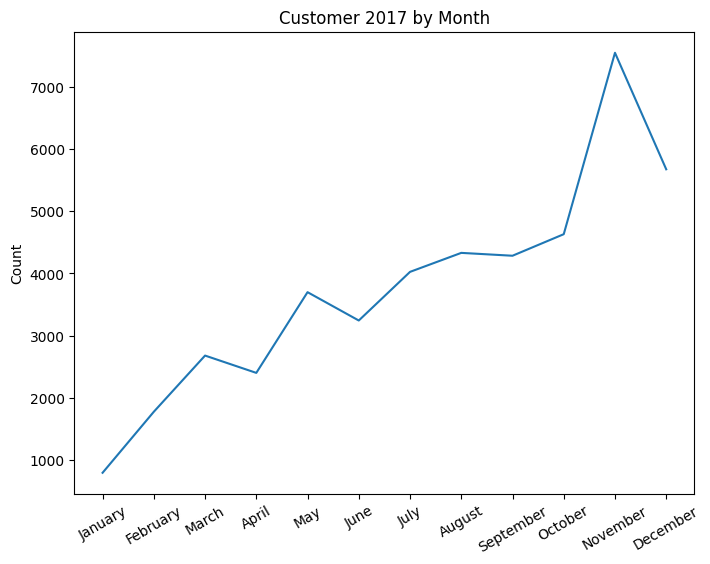

In [77]:
import calendar

# Change number into name of month
month_most_cust['Month'] = [calendar.month_name[m] for m in month_most_cust['order_purchase_timestamp']]

# Create Plot
plt.figure(figsize=(8, 6))
sns.lineplot(month_most_cust, x='Month', y='order_id')

plt.title('Customer 2017 by Month')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=30)

plt.show()

### b. Visualization Question Number 3

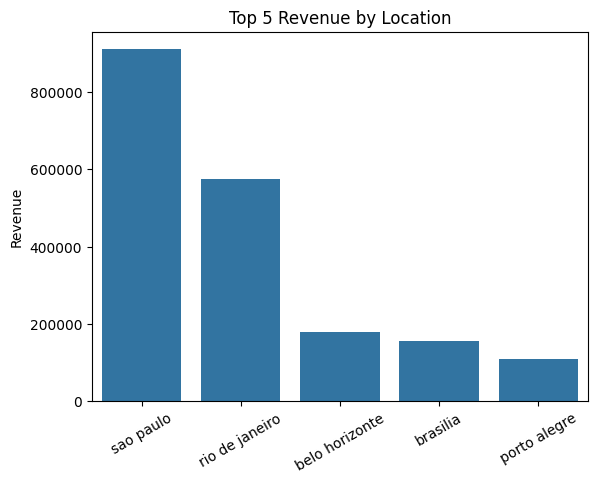

In [78]:
# Top 5 customer city with the most spending
geo_spend = geo_spend.sort_values(by='payment_value', ascending=False).head(5)
geo_spend

sns.barplot(geo_spend, x=geo_spend['customer_city'], y=geo_spend['payment_value'])

plt.title('Top 5 Revenue by Location')
plt.xlabel('')
plt.ylabel('Revenue')

plt.xticks(rotation=30)
plt.show()

### c. RFM Segment Visualization

In [79]:
rfm_data.head(4)

,customer_unique_id,frequency,order_purchase_timestamp,payment_value,recency,R,F,M,RFM Score,Customer_Classification
0,0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,86.22,296,1,100,40,141,Low Value Customer
1,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,43.62,80,3,100,20,123,Low Value Customer
2,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,196.89,47,3,100,50,153,Low Value Customer
3,0005e1862207bf6ccc02e4228effd9a0,1,2017-03-04 23:32:12,150.12,302,1,100,50,151,Low Value Customer


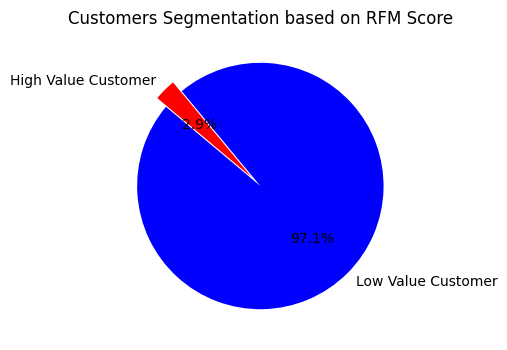

In [80]:
# Create dataset for rfm visualization
rfm_score_visualization = rfm_data['Customer_Classification'].value_counts().reset_index()

# Create visualization for RFM Percentation
plt.figure(figsize=(4, 4))

plt.title('Customers Segmentation based on RFM Score')
plt.pie(rfm_score_visualization['count'], 
        labels=rfm_score_visualization['Customer_Classification'],
        autopct='%1.1f%%', startangle=140,
        explode = (0, 0.1), colors = ['blue', 'red'])

plt.show()


## Conclusion

From above analysis we can get the conclusions from e-commerce dashboard in 2017
- conclusion first question : 
    The average purchases for each customer is `161.20977176888647`. Since the data is skewed, we can use median as central tendency, and the result is more representatif compare to the average. The median purchases of each customer is `104.37`
- conclusion second question : 
    Customers spend the most in November with the Revenue their produce is `1194882.8`. <br>
    Most customers also occured in November with the total Orders is `7544`
- Conclusion third question :
    The highest customer spending is in sao paulo. Followed by rio de janeiro, belo horizonte, etc.
- Conclusion fourth question :
    The average time between consecutive purchases for customers is around 8 days
- Conclusion fifth question :
    Turns out the customer segmentation is divided into two, which `High Value Customer` and `Low Value Customer`. The total customer are 1256 for `High Value Customer`, and 42457 for `Low Value Customer`


## Suggestion

Based on RFM Analysis above, we can know the customer segmentation and start implement strategies to increase their spend and retention.
The strategies we can do includes:
- Advertisement
- Discount
- Free Shipping Fee

This strategies can be addressed to the High Value Customer